In [62]:
import yt
from yt.frontends.gizmo.api import GizmoDataset
from yt import YTArray
from yt import YTQuantity

import numpy as np
import h5py as h5
import os
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm, ListedColormap
import seaborn as sns
import palettable 
sns.set_style("ticks",{'axes.grid': True, 'grid.linestyle': '--'})

import importlib
import yt_helper as yth
import plotting_helper_functions as ph

In [98]:
model_list = ['m12i_mass700_MHDCR_tkFIX', 'cr', 'm11f_mhdcv', 'm11f_cr_700']

yt : [INFO     ] 2022-04-06 17:40:26,317 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2022-04-06 17:40:26,319 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-04-06 17:40:26,361 Parameters: current_time              = 4.3545571088051405e+17 s


3.1218461538461537
3.5331297709923666


yt : [INFO     ] 2022-04-06 17:40:26,362 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-04-06 17:40:26,363 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-06 17:40:26,364 Parameters: domain_right_edge         = [40000. 40000. 40000.]
yt : [INFO     ] 2022-04-06 17:40:26,364 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-04-06 17:40:26,365 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2022-04-06 17:40:26,365 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2022-04-06 17:40:26,366 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2022-04-06 17:40:26,366 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2022-04-06 17:40:26,367 Parameters: hubble_constant           = 0.702
yt : [INFO     ] 2022-04-06 17:40:26,528 Allocating for 5.841e+07 particles
Initializing refined index:  99%|█████████▊| 77/78 [02:26<00:01,  1.90s/it]
yt : [INFO     ] 2022-04-06 17:43:09,361 max valu

[15981.02918036 17764.20519062 19188.13140444] code_length [16332.02918036 18115.20519062 19539.13140444] code_length
x ('gas', 'H_nuclei_density')


yt : [INFO     ] 2022-04-06 17:44:20,891 xlim = 19188.131404 19539.131404
yt : [INFO     ] 2022-04-06 17:44:20,892 ylim = 15981.029180 16332.029180
yt : [INFO     ] 2022-04-06 17:44:20,893 xlim = 19188.131404 19539.131404
yt : [INFO     ] 2022-04-06 17:44:20,893 ylim = 15981.029180 16332.029180
yt : [INFO     ] 2022-04-06 17:44:20,900 Making a fixed resolution buffer of (('gas', 'H_nuclei_density')) 800 by 800


y ('gas', 'H_nuclei_density')


yt : [INFO     ] 2022-04-06 17:45:30,526 xlim = 15981.029180 16332.029180
yt : [INFO     ] 2022-04-06 17:45:30,527 ylim = 17764.205191 18115.205191
yt : [INFO     ] 2022-04-06 17:45:30,528 xlim = 15981.029180 16332.029180
yt : [INFO     ] 2022-04-06 17:45:30,528 ylim = 17764.205191 18115.205191
yt : [INFO     ] 2022-04-06 17:45:30,536 Making a fixed resolution buffer of (('gas', 'H_nuclei_density')) 800 by 800


z ('gas', 'H_nuclei_density')


yt : [INFO     ] 2022-04-06 17:46:41,187 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2022-04-06 17:46:41,189 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-04-06 17:46:41,233 Parameters: current_time              = 4.3545571088051405e+17 s
yt : [INFO     ] 2022-04-06 17:46:41,234 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-04-06 17:46:41,234 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-06 17:46:41,235 Parameters: domain_right_edge         = [40000. 40000. 40000.]
yt : [INFO     ] 2022-04-06 17:46:41,236 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-04-06 17:46:41,236 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2022-04-06 17:46:41,237 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2022-04-06 17:46:41,237 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2022-04-06 17:46:41,237 Parameters: omega_radiation           = 0.

2.2019679144385025


yt : [INFO     ] 2022-04-06 17:46:41,389 Allocating for 5.838e+07 particles
Initializing refined index:  99%|█████████▊| 75/76 [02:20<00:01,  1.87s/it]
yt : [INFO     ] 2022-04-06 17:49:19,146 max value is 6.15532e-21 at 16150.2771488138332643 17936.8385314111801563 19346.9778552522038808
yt : [INFO     ] 2022-04-06 17:49:19,168 xlim = 17761.338531 18112.338531
yt : [INFO     ] 2022-04-06 17:49:19,169 ylim = 19171.477855 19522.477855
yt : [INFO     ] 2022-04-06 17:49:19,169 xlim = 17761.338531 18112.338531
yt : [INFO     ] 2022-04-06 17:49:19,170 ylim = 19171.477855 19522.477855
yt : [INFO     ] 2022-04-06 17:49:19,178 Making a fixed resolution buffer of (('gas', 'H_nuclei_density')) 800 by 800


[15974.77714881 17761.33853141 19171.47785525] code_length [16325.77714881 18112.33853141 19522.47785525] code_length
x ('gas', 'H_nuclei_density')


yt : [INFO     ] 2022-04-06 17:50:37,222 xlim = 19171.477855 19522.477855
yt : [INFO     ] 2022-04-06 17:50:37,223 ylim = 15974.777149 16325.777149
yt : [INFO     ] 2022-04-06 17:50:37,224 xlim = 19171.477855 19522.477855
yt : [INFO     ] 2022-04-06 17:50:37,225 ylim = 15974.777149 16325.777149
yt : [INFO     ] 2022-04-06 17:50:37,233 Making a fixed resolution buffer of (('gas', 'H_nuclei_density')) 800 by 800


y ('gas', 'H_nuclei_density')


yt : [INFO     ] 2022-04-06 17:51:53,032 xlim = 15974.777149 16325.777149
yt : [INFO     ] 2022-04-06 17:51:53,033 ylim = 17761.338531 18112.338531
yt : [INFO     ] 2022-04-06 17:51:53,034 xlim = 15974.777149 16325.777149
yt : [INFO     ] 2022-04-06 17:51:53,034 ylim = 17761.338531 18112.338531
yt : [INFO     ] 2022-04-06 17:51:53,042 Making a fixed resolution buffer of (('gas', 'H_nuclei_density')) 800 by 800


z ('gas', 'H_nuclei_density')
2.4134634146341463


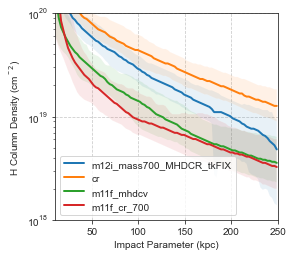

In [31]:
importlib.reload(ph)
# plottting H profile plot

field = 'H_nuclei_density'
# dont' need to run this because already generated the data
#ph.generate_projection_data('cr', field_list = [('gas', field)], weight_list = [None])
fig, ax = plt.subplots(figsize = (4,3.8))
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim(10, 250)
ax.set_ylim(1e18, 1e20)
ax.set_xlabel('Impact Parameter (kpc)')
ax.set_ylabel('H Column Density (cm$^{^-2}$)')
for model in ['m12i_mass700_MHDCR_tkFIX', 'cr', 'm11f_mhdcv', 'm11f_cr_700']:
    ph.generate_projection_data(model, field_list = [('gas', field)], weight_list = [None])

    xbins, ybins, counts = ph.generate_profile_from_projection('H_nuclei_density', model, ylims = (18, 22))
    print(np.max(counts))
    # note: there's a bug with the line below. as far as i can tell, 
    x_med, median, mean, lowlim, uplim = ph.calculate_median_profile_from_meshgrid(xbins[1:], ybins[1:], counts,
                                                                  nbins = 100, convert_to_linear = False)
    
    
   # print(x_med, mean)
    
    ax.plot(x_med, median, linewidth = 2, label = model)
    ax.fill_between(x_med, lowlim, uplim, alpha = 0.1)
    
ax.legend()
plt.savefig('plots/H_column_temp.png', dpi =300)


yt : [INFO     ] 2022-06-24 16:08:11,601 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2022-06-24 16:08:11,606 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-06-24 16:08:11,662 Parameters: current_time              = 4.3545571088051405e+17 s
yt : [INFO     ] 2022-06-24 16:08:11,663 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-06-24 16:08:11,664 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-24 16:08:11,668 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2022-06-24 16:08:11,670 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-06-24 16:08:11,672 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2022-06-24 16:08:11,675 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2022-06-24 16:08:11,676 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2022-06-24 16:08:11,677 Parameters: omega_radiation           = 0.

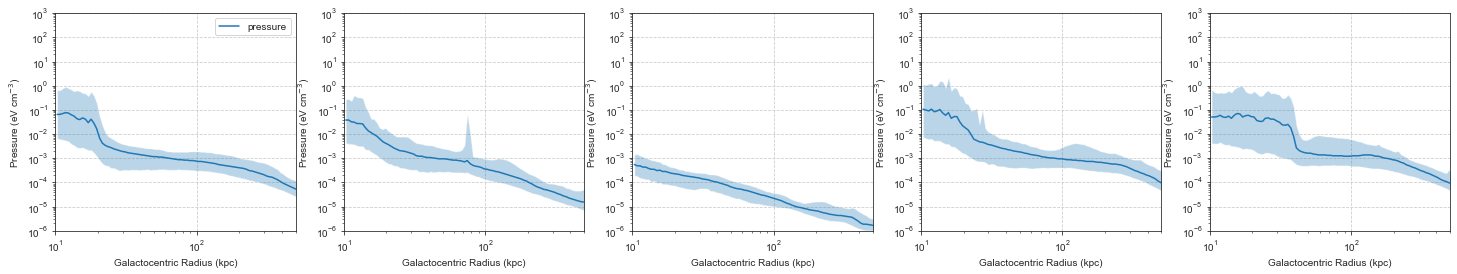

In [159]:
# plotting pressure profiles
# note: maybe should redo these to be volume weighted...

importlib.reload(ph)
importlib.reload(yth)
pressure_field_list = ['pressure', 'kinetic_energy', 'magnetic_pressure', 'cosmic_ray_pressure']
pressure_field_list = ['pressure', 'magnetic_pressure']
pressure_field_list = ['pressure']
label_list = pressure_field_list
model_list = ['m12i_cr', 'm11f_cr', 'm11i_cr', 'm12f_cr', 'm12m_cr']
#label_list = ['thermal pressure', 'kinetic pressure', 'magnetic pressure', 'cosmic ray pressure']
color_list = ['blue', 'orange']

# dont' need to run this because already generated the data
#ph.generate_projection_data('cr', field_list = [('gas', field)], weight_list = [None])

#model_list = ['m11f_cr_700', 'cr']

fig, ax = plt.subplots(ncols = len(model_list), figsize = (5*len(model_list),4), 
                       sharex = True, sharey = False)
#ax.set_xscale('log')
ax[0].set_xlim(10, 1000)

for i, model in enumerate(model_list):
   # if i > 0:
   #     pressure_field_list = pressure_field_list[:2]
    data = ph.get_radial_pressure_profile_data(model, field_list = pressure_field_list, weight_field = 'ones')
    r = data['spherical_position_radius']
    for j, field in enumerate(pressure_field_list):
      #  print(model, field, data['%s_median'%field], data['%s_lowlim'%field],  data['%s_uplim'%field])

        ax[i].plot(r, data['%s_median'%field], label = field)
        ax[i].fill_between(r, data['%s_lowlim'%field], data['%s_uplim'%field], alpha = 0.3)
        
        
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].set_xlabel('Galactocentric Radius (kpc)')
    ax[i].set_ylabel('Pressure (eV cm$^{-3}$)')
    ax[i].set_ylim(1e-6, 1e3)
    
ax[0].legend()
plt.savefig('pressure_profile.png', dpi = 300)

# NOTE need to regenerate pressure field for CR galaxy 
# NOTE: weird bug: if trying to generate more than one pressure field per galaxy, doesn't actually save (or generate?) correct values

In [89]:
data = h5.File('data/radial_pressure_profile_data_m12i.h5', 'a')
print(data.keys())
field_name = 'pressure'
for append in ['mean', 'median', 'uplim', 'lowlim']:
    name = '%s_%s'%(field_name, append)
    print(name)
    if name in data.keys():
        del data[name]
data.close()    

<KeysViewHDF5 ['kinetic_energy_lowlim', 'kinetic_energy_mean', 'kinetic_energy_median', 'kinetic_energy_uplim', 'pressure_lowlim', 'pressure_mean', 'pressure_median', 'pressure_uplim', 'spherical_position_radius']>
pressure_mean
pressure_median
pressure_uplim
pressure_lowlim


In [8]:
importlib.reload(yth)

ds, center = yth.load_ds(model_list[0])

yt : [INFO     ] 2022-06-22 15:14:39,086 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2022-06-22 15:14:39,088 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-06-22 15:14:39,146 Parameters: current_time              = 4.3545571088051405e+17 s
yt : [INFO     ] 2022-06-22 15:14:39,147 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-06-22 15:14:39,147 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-22 15:14:39,148 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2022-06-22 15:14:39,149 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-06-22 15:14:39,149 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2022-06-22 15:14:39,149 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2022-06-22 15:14:39,150 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2022-06-22 15:14:39,151 Parameters: omega_radiation           = 0.

In [20]:
#pb= sp[('gas','magnetic_pressure')]
ydata = np.log10(pb.in_units('eV/cm**3'))
xdata = np.log10(sp[('gas', 'spherical_position_radius')].in_units('kpc'))
zdata = sp[('gas', 'ones')]

                    
                    
                 

/Users/irynabutsky/software/miniconda3/lib/python3.8/site-packages/unyt/array.py:1674: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


In [45]:
nbins = 500
xbins = np.linspace(1, np.log10(500), nbins)
ybins = np.linspace(-6, 3, nbins)

H, xedges, yedges = np.histogram2d(xdata, ydata, bins = (xbins, ybins), weights = zdata)



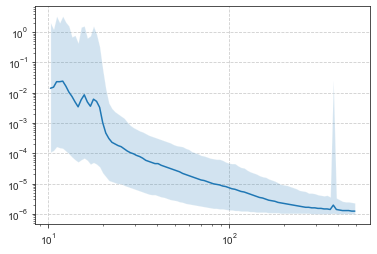

In [74]:
xbins, median, mean, lowlim, uplim = ph.calculate_median_profile_from_meshgrid(xedges[:-1], yedges[:-1], H, nbins = 100)
plt.plot(xbins, median)
plt.fill_between(xbins, lowlim, uplim, alpha = 0.2)
plt.xscale('log')
plt.yscale('log')

In [68]:
print(median, lowlim, uplim)


[1.40700809e-02 1.52886359e-02 2.31595149e-02 2.31595149e-02
 2.41415712e-02 1.66127252e-02 1.05206867e-02 7.54667263e-03
 4.98189752e-03 3.42823149e-03 5.88219040e-03 8.54798453e-03
 4.98189752e-03 3.57360225e-03 6.13161884e-03 5.19314994e-03
 3.28877429e-03 1.02807322e-03 4.67023439e-04 3.08303146e-04
 2.30528939e-04 2.03524752e-04 1.79683839e-04 1.65362441e-04
 1.40053055e-04 1.18617372e-04 1.04722519e-04 9.63757866e-05
 8.50863158e-05 7.83046540e-05 6.91320378e-05 5.85511016e-05
 5.38843844e-05 4.95896201e-05 4.56371628e-05 4.56371628e-05
 4.02912203e-05 3.70798763e-05 3.41244871e-05 3.14046522e-05
 2.89015972e-05 2.65980440e-05 2.44780916e-05 2.16107251e-05
 1.98882786e-05 1.83031168e-05 1.68442976e-05 1.55017512e-05
 1.42662102e-05 1.31291459e-05 1.25950646e-05 1.15911962e-05
 1.06673394e-05 9.81711702e-06 9.41776601e-06 9.03466021e-06
 8.31456781e-06 7.97633907e-06 7.34059837e-06 6.75552832e-06
 6.48071983e-06 5.96418495e-06 5.48881961e-06 5.26553963e-06
 4.84585864e-06 4.459627

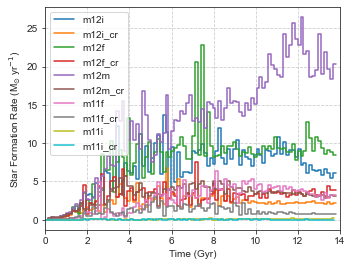

In [160]:
def generate_sfh_data(model, nbins = 100, save = True):
    ds, center = yth.load_ds(model)
    ad = ds.all_data()
    creation_time = ad[('PartType4', 'creation_time')].in_units('yr')
    stellar_mass = ad[('PartType4', 'particle_mass')].in_units('Msun')
    current_time = ds.current_time.in_units('yr')
    
    time_list = np.linspace(0, current_time, nbins)
    mass_list = np.array([])
    for i in range(1, len(time_list)):
        dt = time_list[i] - time_list[i-1]
        mask = (creation_time >= time_list[i-1]) & (creation_time < time_list[i])
        mass_list = np.append(mass_list, np.sum(stellar_mass[mask]) / dt)
    x = np.vstack((time_list[:-1], time_list[1:])).reshape((-1), order = 'F') / 1e9 # in Gyr
    y = np.vstack((mass_list, mass_list)).reshape((-1), order = 'F')
    
    if save:
        f = h5.File('data/sfh_%s.h5'%model, 'w')
        f.create_dataset('time', data = x)
        f.create_dataset('sfr', data = y)
        f.close()
    else:
        return x, y
    
def plot_sfh(model_list, label_list = None):
    fig, ax = plt.subplots(figsize = (5, 3.8))
    if label_list is None:
        label_list = model_list
    palette = [palettable.wesanderson.Darjeeling2_5.mpl_colors[1], 
              palettable.wesanderson.Margot2_4.mpl_colors[-1], 
              palettable.wesanderson.Moonrise1_5.mpl_colors[2], 
              palettable.wesanderson.Moonrise4_5.mpl_colors[-1], 
              palettable.wesanderson.IsleOfDogs2_6.mpl_colors[0]]
    palette = [palettable.wesanderson.Moonrise2_4.mpl_colors[0], 
              palettable.wesanderson.Moonrise2_4.mpl_colors[1], 
              palettable.wesanderson.Moonrise1_5.mpl_colors[2], 
              palettable.wesanderson.Moonrise4_5.mpl_colors[-1], 
              palettable.wesanderson.IsleOfDogs2_6.mpl_colors[0]]
    palette = sns.color_palette()
   # palette = sns.color_palette("tab20c")[::4]
    for model, label, color in zip(model_list, label_list, palette):
        fname = 'data/sfh_%s.h5'%model
        if not os.path.isfile(fname):
            ph.get_sfh_data(model)
        h5file = h5.File('data/sfh_%s.h5'%model, 'r')
        time = h5file['time'][:]
        sfr = h5file['sfr'][:]
        

        ax.plot(time, sfr, label = label, color = color)
        
    ax.legend()
    ax.set_xlabel('Time (Gyr)')
    ax.set_ylabel('Star Formation Rate (M$_{\odot}$ yr$^{-1}$)')
    ax.set_xlim(0, 14)
   # ax.set_ylim(0, 7)
    fig.tight_layout()
    plt.savefig('sfr.png', dpi =300)
   
#generate_sfh_data(model_list[0])
plot_sfh(['m12i', 'm12i_cr', 'm12f', 'm12f_cr', 'm12m', 'm12m_cr', 'm11f', 'm11f_cr', 'm11i', 'm11i_cr'])

yt : [INFO     ] 2022-06-24 17:44:36,776 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2022-06-24 17:44:36,778 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-06-24 17:44:36,832 Parameters: current_time              = 4.3545571088051405e+17 s
yt : [INFO     ] 2022-06-24 17:44:36,833 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-06-24 17:44:36,833 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-24 17:44:36,836 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2022-06-24 17:44:36,837 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-06-24 17:44:36,839 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2022-06-24 17:44:36,839 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2022-06-24 17:44:36,840 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2022-06-24 17:44:36,841 Parameters: omega_radiation           = 0.

ValueError: x and y must have same first dimension, but have shapes (1,) and (100,)

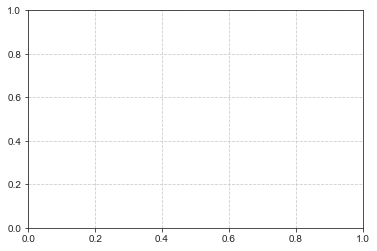

In [185]:
importlib.reload(ph)
impact, vcirc = ph.get_vcirc_profile('m12i_cr')
plt.plot(impact, vcirc)

In [182]:
importlib.reload(ph)
print(ph.estimate_sfr('m12i_cr', time_interval = 3e9))

2.2318246461873232


In [153]:
ds, center = yth.load_ds('m11f')

yt : [INFO     ] 2022-06-23 18:06:42,392 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2022-06-23 18:06:42,394 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-06-23 18:06:42,457 Parameters: current_time              = 4.3545571088051405e+17 s
yt : [INFO     ] 2022-06-23 18:06:42,458 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-06-23 18:06:42,459 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 18:06:42,461 Parameters: domain_right_edge         = [40000. 40000. 40000.]
yt : [INFO     ] 2022-06-23 18:06:42,462 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-06-23 18:06:42,463 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2022-06-23 18:06:42,464 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2022-06-23 18:06:42,465 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2022-06-23 18:06:42,466 Parameters: omega_radiation           = 0.

In [154]:
ds.derived_field_list

[('PartType0', 'C_metallicity'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_nuclei_mass_density'),
 ('PartType0', 'Ca_metallicity'),
 ('PartType0', 'Ca_nuclei_density'),
 ('PartType0', 'Ca_nuclei_mass_density'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'DivBcleaningFunctionGradPhi'),
 ('PartType0', 'DivBcleaningFunctionPhi'),
 ('PartType0', 'DivergenceOfMagneticField'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'Fe_metallicity'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_nuclei_mass_density'),
 ('PartType0', 'H_nuclei_density'),
 ('PartType0', 'H_p0_density'),
 ('PartType0', 'H_p0_fraction'),
 ('PartType0', 'H_p0_mass'),
 ('PartType0', 'H_p0_number_density'),
 ('PartType0', 'H_p1_density'),
 ('PartType0', 'H_p1_fraction'),
 ('PartType0', 'H_p1_mass'),
 ('PartType0', 'H_p1_number_density'),
 ('PartType0', 'He_metallicity'),
 ('PartType0', 'He_nuclei_density'),
 ('PartType0', 'He_nuclei_mass_density'),
 ('PartType0', 'Int